In [7]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#name:sagar ravishankar dahale
#prn:1032211914
#div:A1
#batch:A4

In [14]:
img1 = cv2.imread('g.jpg',0)
img1 = cv2.resize(img1, (600,600))

img2 = cv2.imread('g2.jpg',0)
img2 = cv2.resize(img2, (600,600))

Text(0.5, 1.0, 'Target Image')

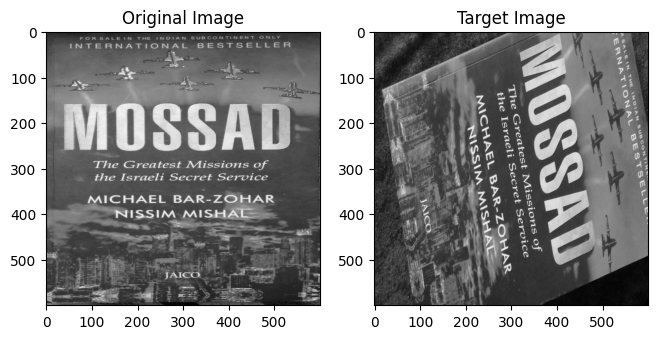

In [15]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(img1, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 3, 2)
plt.imshow(img2, cmap='gray')
plt.title('Target Image')

In [16]:
sift = cv2.xfeatures2d.SIFT_create()

In [18]:
keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)

Descriptors:
 [[ 2.  0.  0. ... 10. 16.  8.]
 [10.  8.  2. ...  0.  0.  0.]
 [12.  5.  0. ... 14.  5. 49.]
 ...
 [ 4.  0.  0. ...  6. 24. 10.]
 [ 5.  6. 18. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]


Text(0.5, 1.0, 'Keypoints')

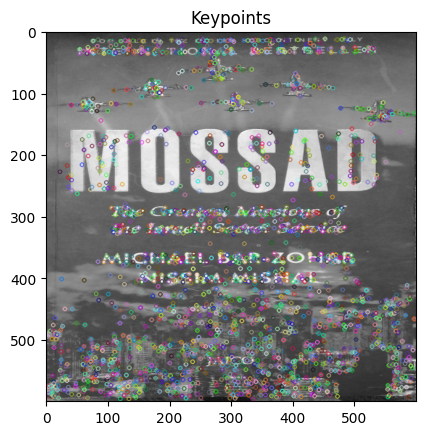

In [19]:

img_1 = img1.copy()
img_1 = cv2.drawKeypoints(img1,keypoints_1,img_1)
print("Descriptors:\n",descriptors_1)
plt.imshow(img_1)
plt.title("Keypoints")

In [20]:

bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)
matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key=lambda x:x.distance)

Text(0.5, 1.0, 'Feature Matching')

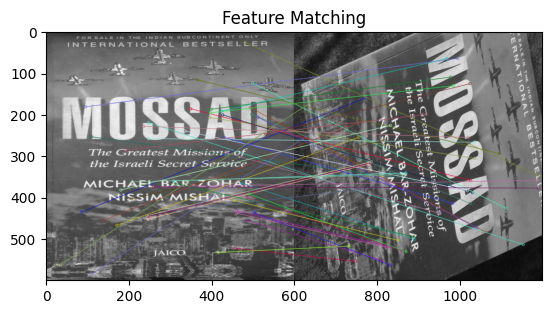

In [21]:
img3 = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:50],img2,flags=2)
plt.imshow(img3)
plt.title('Feature Matching')

In [22]:
src_pts = np.float32([keypoints_1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
dst_pts = np.float32([keypoints_2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)

# Find homography
H, _ = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
print("Homography Transform:\n",H)

Homography Transform:
 [[ 1.33406351e-01 -8.75080109e-01  5.40087765e+02]
 [ 9.20365699e-01  4.08555298e-01 -9.62443684e+01]
 [-5.66990111e-05 -3.26567164e-06  1.00000000e+00]]


In [23]:

# Warp image using homography
img_warped = cv2.warpPerspective(img1, H, (img2.shape[1], img2.shape[0]))

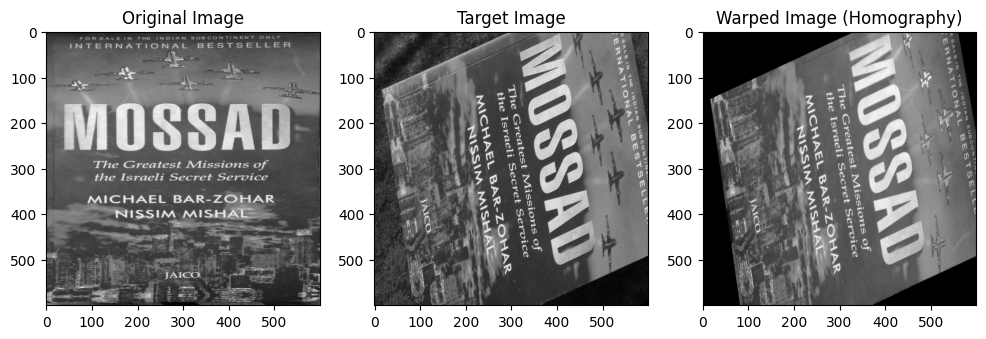

In [24]:

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(img1, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 3, 2)
plt.imshow(img2, cmap='gray')
plt.title('Target Image')
plt.subplot(1, 3, 3)
plt.imshow(img_warped, cmap='gray')
plt.title('Warped Image (Homography)')
plt.show()